# 📱 SMS Spam Classification — Exploratory Data Analysis (EDA)

This notebook performs a complete Exploratory Data Analysis (EDA) on the **SMS Spam Collection Dataset** from [UCI/Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset).  
The dataset contains **5,574 SMS messages**, each labeled as either:

- **ham** → legitimate/non-spam  
- **spam** → unsolicited or advertising message  

---

## 🔍 Purpose of This Notebook

The goal of this EDA is to understand the structure and characteristics of the text data **before any preprocessing or modeling**.  
This includes analyzing:

- Label distribution  
- Message length patterns  
- Word/character statistics  
- Common words in spam vs ham  
- Text cleaning needs and potential feature insights  

---

## 🧠 Why EDA Matters Here

SMS spam detection is a **text-based classification problem**, and good EDA reveals patterns such as:

- Spam messages often being longer or using specific keywords  
- Imbalances in the dataset  
- Noise or text cleaning issues  
- Useful engineered features (length, word count, punctuation, etc.)  

This EDA prepares the foundation for **future NLP preprocessing and model building** — but this notebook focuses solely on understanding the raw text data.

---

## 1. Setup: Libraries and Modules

This section imports all the necessary Python libraries for Exploratory Data Analysis (EDA) on the SMS Spam dataset.

These libraries cover everything from **data loading** and **text preprocessing** to **visualization** of patterns in the dataset:

- `pandas` and `numpy` → data handling and numerical operations  
- `matplotlib.pyplot` and `seaborn` → visualization  
- `nltk` → text processing (tokenization, stopwords)  
- `re` → regular expressions for text cleaning  
- `collections.Counter` → counting word occurrences  
- `wordcloud.WordCloud` → visualize most frequent words  
- `emoji` → handle emojis in text  
- `sklearn.feature_extraction` → convert text to numerical features (CountVectorizer, TF-IDF)  


In [2]:
# 1. Setup: Libraries and Modules

from collections import Counter   # Count occurrences of words
import emoji                      # Handle emojis in text
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Advanced plotting
sns.set(style='whitegrid')        # Clean, white-grid style for plots

import nltk                       # Natural language processing
from nltk.corpus import stopwords # Common words to ignore in analysis

import numpy as np                # Numerical computations
import pandas as pd               # Data handling

import re                         # Regular expressions for text cleaning
import os                         # File path handling

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Convert text to numeric features

from wordcloud import WordCloud   # Visualize most frequent words

---
## 2. Load Dataset

In this section, we load the **SMS Spam Collection Dataset** and take a first look at the data.

The dataset contains two main columns:

- `label` → indicates whether the message is **ham** (legitimate) or **spam** (unsolicited)  
- `text` → the content of the SMS message  

We will also preview the first few rows to understand the structure.

In [4]:
# Path to the dataset file
DATA_DIR = '/kaggle/input/sms-spam-collection-dataset/spam.csv'

# Load the dataset with pandas, selecting only the relevant columns
df = pd.read_csv(DATA_DIR, encoding='latin1')[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'text']

# Preview the first 5 rows of the dataset
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


---
## 3. Explore Labels and Message Length

In this section, we examine the **distribution of labels** and the **length of SMS messages**.  

We will:

- Check the **count** and **percentage** of each label (spam vs ham)  
- Visualize the distribution with a **pie chart**  
- Look at **example messages** for each label  
- Analyze **message lengths** with histograms  
- Compare message lengths between **spam and ham** messages
---

### 3.1 Label Counts and Percentages

Check how many messages belong to each class (`ham` or `spam`) and calculate the percentage of each.


In [7]:
# Explore the count and percentage of each label (spam vs ham)
df['label'].value_counts().sort_index()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
# Percentage of each label
df['label'].value_counts(normalize= True) * 100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

### 3.2 Visualize Label Distribution

Visualize the proportion of spam vs ham messages using a pie chart to understand dataset balance.


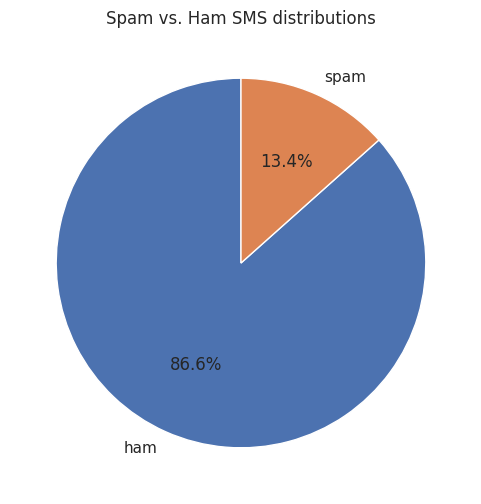

In [9]:
# Pie chart for spam vs ham distribution
label_counts = df['label'].value_counts()
plt.figure(figsize= (6, 6))
plt.pie(label_counts, labels= label_counts.index, autopct= "%1.1f%%",startangle= 90)
plt.title("Spam vs. Ham SMS distributions")
plt.show()

### 3.3 Preview Sample Messages

Print one example message from each class to get a sense of the text content in spam and ham messages.


In [10]:
# Preview one example message per label
for label in df['label'].unique():
    msg = df.loc[df['label'] == label, 'text'].iloc[0]
    print(f"Label: {label}")
    print(f"Text: {msg}")
    print("-" * 60)

Label: ham
Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
------------------------------------------------------------
Label: spam
Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
------------------------------------------------------------


### 3.4 Message Length Histogram

Add a new column for message length (number of characters) and visualize the distribution of message lengths.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


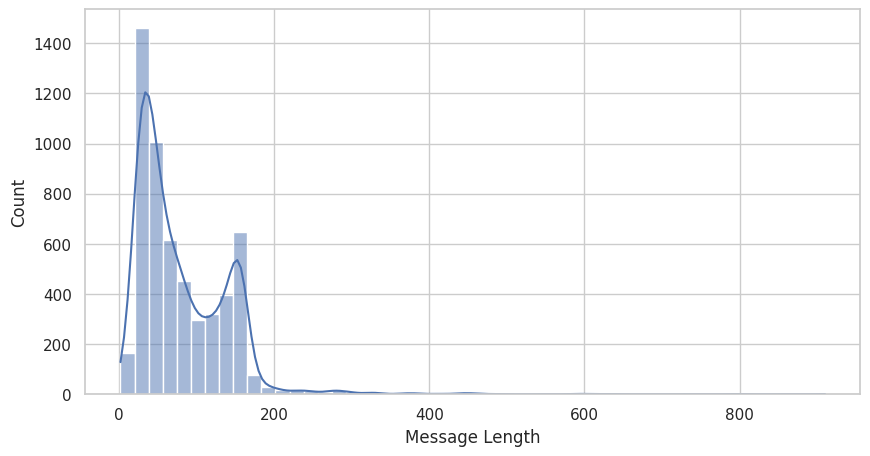

In [11]:
# Add message length column and plot histogram
df['text_length'] = df['text'].apply(len)
plt.figure(figsize= (10, 5))
sns.histplot(df['text_length'], bins= 50, kde= True)
plt.ylabel("Count")
plt.xlabel("Message Length")
plt.show()

### 3.5 Message Length by Label

Visualize message length distributions separately for spam and ham messages to see if there are noticeable differences.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

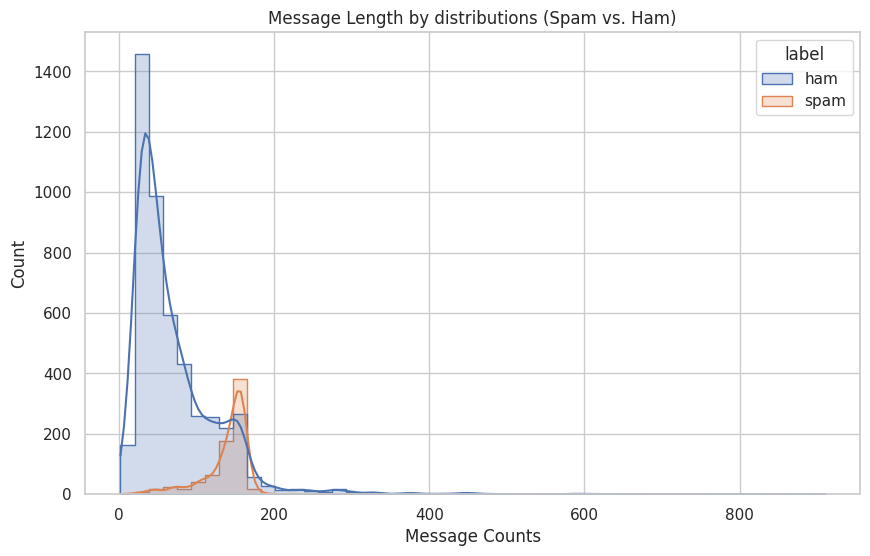

In [12]:
# Histogram of message lengths by label
plt.figure(figsize= (10, 6))
sns.histplot(
    data= df,
    x= 'text_length',
    hue= 'label',
    bins= 50,
    kde= True,
    element= 'step',
    stat= 'count'
)
plt.title("Message Length by distributions (Spam vs. Ham)")
plt.xlabel("Message Counts")
plt.ylabel("Count")
plt.show()

## 4. Text Length and Word Counts

This section performs a deeper numerical exploration of SMS messages.  
We will calculate character and word counts, inspect statistics overall and per label, check shortest/longest messages, and visualize distributions.

---

### 4.1 Handle Missing Text

Ensure that the `text` column has no missing values by filling them with empty strings.

In [13]:
# 1. safety: drop / fill missing text if any
df['text'] = df['text'].fillna('')

### 4.2 Add Character and Word Counts

Create new columns for **number of characters** and **number of words** in each message.

In [14]:
# 2. add character and word counts
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].str.split().apply(len)

### 4.3 Quick Numeric Summaries

Compute overall summary statistics for character and word counts, and calculate per-label mean, median, and standard deviation.

In [15]:
# 4.3 Numeric summaries
print("Overall text stats:")
print(df[['char_count','word_count']].describe().T[['count','mean','50%','std','min','max']])
print("\nPer-label mean/median:")
print(df.groupby('label')[['char_count','word_count']].agg(['mean','median','std']).round(2))

Overall text stats:
             count       mean   50%        std  min    max
char_count  5572.0  80.118808  61.0  59.690841  2.0  910.0
word_count  5572.0  15.494436  12.0  11.329427  1.0  171.0

Per-label mean/median:
      char_count               word_count              
            mean median    std       mean median    std
label                                                  
ham        71.02   52.0  58.02      14.20   11.0  11.42
spam      138.87  149.0  29.18      23.85   25.0   5.81


### 4.4 Shortest and Longest Messages

Inspect the shortest and longest messages for each label to understand text length extremes.

In [16]:
# 4.4 Show shortest and longest messages per label
for label in df['label'].unique():
    sub = df[df['label']==label].sort_values('char_count')
    print(f"\nLabel = {label}  |  shortest (len={sub.iloc[0]['char_count']}):")
    print(sub.iloc[0]['text'])
    print("-"*60)
    print(f"Label = {label}  |  longest (len={sub.iloc[-1]['char_count']}):")
    print(sub.iloc[-1]['text'][:1000])  # safety cutoff in case extremely long
    print("\n"+ "="*80)


Label = ham  |  shortest (len=2):
Ok
------------------------------------------------------------
Label = ham  |  longest (len=910):
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.

### 4.5 Character and Word Count Distributions

Visualize histograms for character and word counts, separated by label, to compare message lengths.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

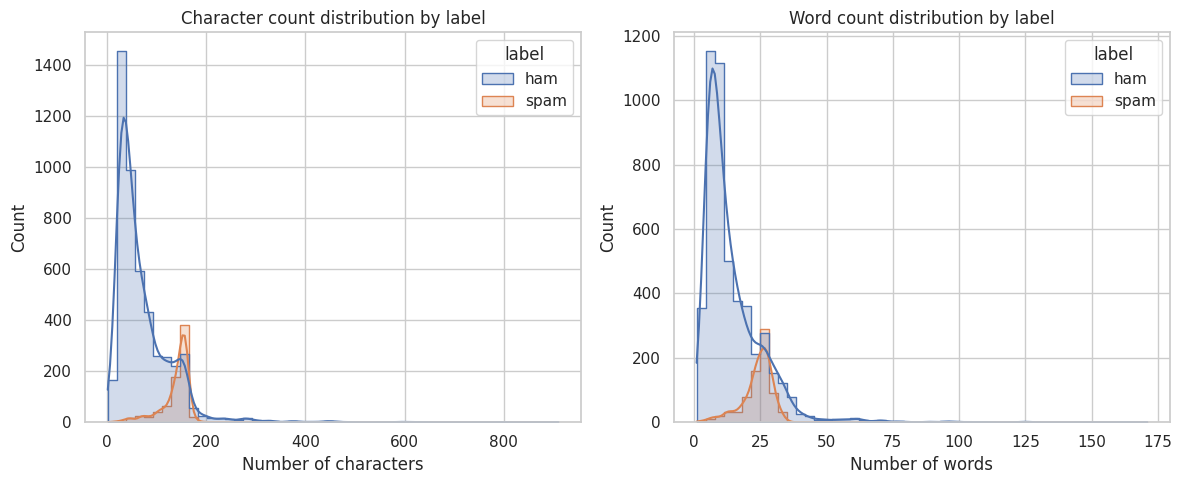

In [17]:
# 4.5 Histogram plots for char_count and word_count by label
sns.set(style="whitegrid")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='char_count', hue='label', bins=50, kde=True, element='step', stat='count')
plt.title('Character count distribution by label')
plt.xlabel('Number of characters')

plt.subplot(1,2,2)
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, element='step', stat='count')
plt.title('Word count distribution by label')
plt.xlabel('Number of words')

plt.tight_layout()
plt.show()

### 4.6 Character vs Word Count Scatter

Optionally, explore messages with many characters but few words using a scatter plot.

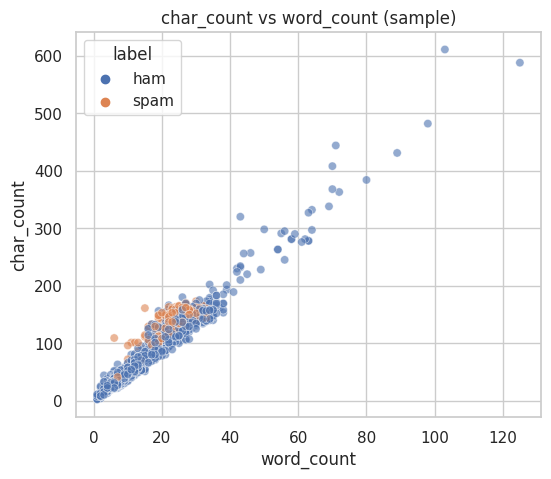

In [18]:
# 4.6 Scatter plot: char_count vs word_count (sample)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(2000, len(df))), x='word_count', y='char_count', hue='label', alpha=0.6)
plt.title('char_count vs word_count (sample)')
plt.show()

## 5. Most Common Words Analysis

In this section, we analyze the most frequent words in **ham** and **spam** messages.  
We remove common English stopwords and non-alphabetic tokens to focus on meaningful words.

---

### 5.1 Download Stopwords and Prepare List

Download NLTK stopwords and create a set for filtering common words.

In [20]:
# 5.1 Download stopwords and prepare the list
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 5.2 Separate Messages by Label

Split the dataset into **ham** and **spam** messages for separate analysis.

In [21]:
# 5.2 Separate messages by label
ham_msgs = df[df['label'] == 'ham']['text']
spam_msgs = df[df['label'] == 'spam']['text']

### 5.3 Function to Extract Words

Define a function to extract words from messages:  
- Convert to lowercase  
- Split by space  
- Keep only alphabetic words  
- Exclude stopwords

In [22]:
# 5.3 Function to extract filtered words from messages
def get_words(messages):
    words = []
    for msg in messages:
        for word in msg.lower().split():
            if word.isalpha() and word not in stop_words:
                words.append(word)
    return words

### 5.4 Apply Function to Ham and Spam Messages

Generate word lists for **ham** and **spam** messages separately.

In [23]:
ham_words = get_words(ham_msgs)
spam_words = get_words(spam_msgs)
print('Getting words of ham and spam texts is done successfully !')

Getting words of ham and spam texts is done successfully !


### 5.5 Most Common Words

Use `Counter` to find the top 20 most frequent words in **ham** and **spam** messages.

In [24]:
# 5.4 Extract words for ham and spam
ham_common = Counter(ham_words).most_common(20)
spam_common = Counter(spam_words).most_common(20)

print(f"Most common Words in Ham SMSs: {ham_common}\n")
print(f"Most common Words in Span SMSs: {spam_common}\n")

Most common Words in Ham SMSs: [('u', 874), ('get', 293), ('go', 235), ('ur', 235), ('got', 227), ('like', 221), ('call', 215), ('come', 215), ('know', 208), ('good', 187), ('going', 157), ('ok', 156), ('want', 153), ('time', 153), ('love', 149), ('need', 147), ('still', 144), ('one', 141), ('n', 134), ('r', 131)]

Most common Words in Span SMSs: [('call', 342), ('free', 180), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101), ('stop', 89), ('get', 82), ('new', 69), ('send', 65), ('nokia', 64), ('win', 58), ('prize', 58), ('cash', 56), ('contact', 56), ('please', 52), ('service', 48)]



### 5.6 Bar Plot of Top Words

Visualize the 20 most frequent words in **ham** and **spam** messages.

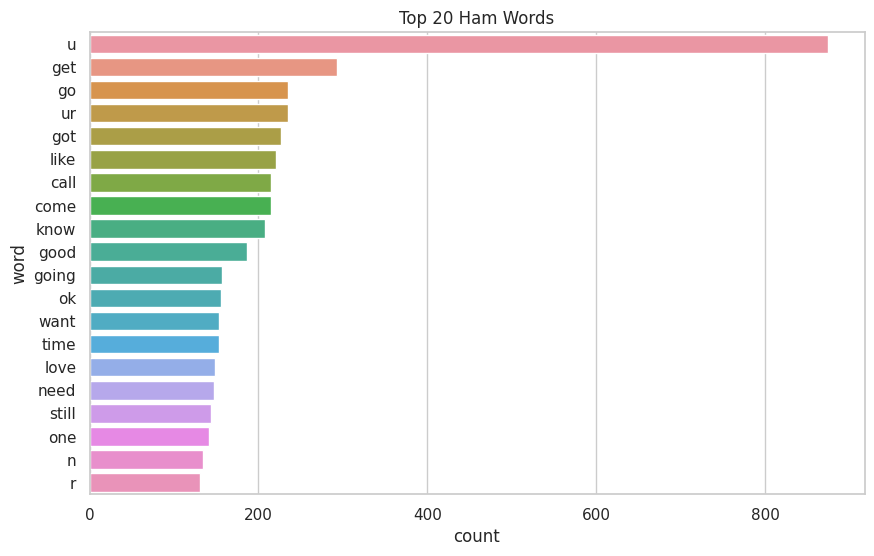

In [25]:
# Ham words
ham_df = pd.DataFrame(ham_common, columns=['word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=ham_df)
plt.title("Top 20 Ham Words")
plt.show()

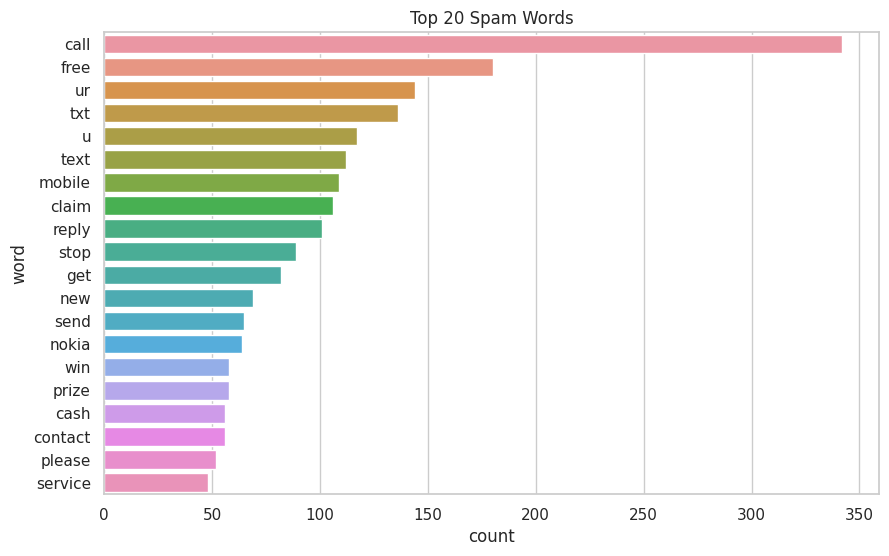

In [26]:
# Spam words
spam_df = pd.DataFrame(spam_common, columns=['word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=spam_df)
plt.title("Top 20 Spam Words")
plt.show()

## 6. Word Clouds

In this section, we visualize the most frequent words in **ham** and **spam** messages using WordClouds.  
This gives an intuitive, visual understanding of which words dominate each class.

---

### 6.1 Prepare Text for WordClouds

Combine all messages of each label into a single lowercase string for generating WordClouds.

In [27]:
# 6.1 Combine all text by label
ham_text = " ".join(df[df['label']=='ham']['text'].str.lower())
spam_text = " ".join(df[df['label']=='spam']['text'].str.lower())

### 6.2 Messages WordCloud

Generate and display a WordCloud for **ham** and **spam** messages, ignoring stopwords.

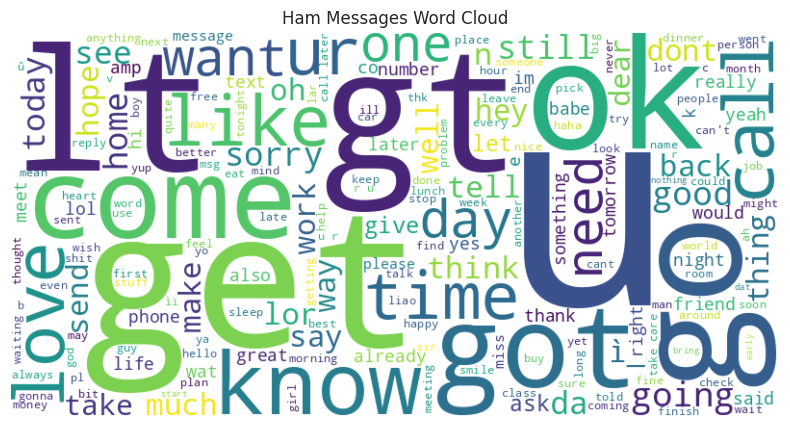

In [28]:
# Ham Word Cloud
ham_wc = WordCloud(width=800, height=400, background_color='white',
                   stopwords=stop_words).generate(ham_text)
plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Messages Word Cloud")
plt.show()

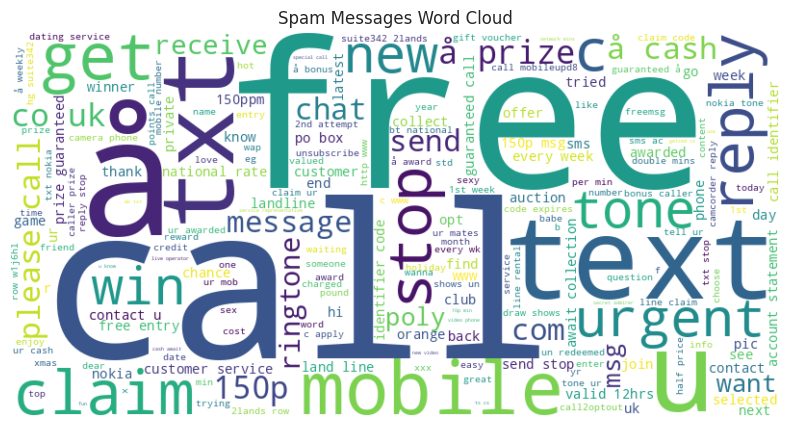

In [29]:
# Spam Word Cloud
spam_wc = WordCloud(width=800, height=400, background_color='white',
                    stopwords=stop_words).generate(spam_text)
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Messages Word Cloud")
plt.show()

## 7. N-grams Analysis

In this section, we analyze **common bigrams and trigrams** in spam and ham messages.  
N-grams are sequences of words that appear together frequently, which can help reveal common phrases in each class.

---

### 7.1 Define N-grams Function

Create a function to compute the top `n` n-grams from a corpus using `CountVectorizer`.

In [31]:
# 7.1 Function to compute top n-grams
def ngrams(corpus, ngram_range= (2,2), n= 10):
    """
    corpus: list or pandas series of text
    ngram_range: (min_n, max_n) e.g., (2,2) for bigrams, (3,3) for trigrams
    n: top n n-grams to return
    """
    vec = CountVectorizer(ngram_range= ngram_range, stop_words= 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis= 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse= True)

    return words_freq[:n]

### 7.2 Top Bigrams

Compute and display the **top 10 bigrams** for spam and ham messages.

In [34]:
# 7.2 Top 10 spam bigrams
top_spam_bigrams = ngrams(spam_msgs, ngram_range=(2,2), n=10)
print("Top 10 spam bigrams:")
for bigram, freq in top_spam_bigrams:
    print(f"{bigram}: {freq}")


print("\n" +  "-"* 60)

# 7.2 Top 10 ham bigrams
top_ham_bigrams = ngrams(ham_msgs, ngram_range=(2,2), n=10)
print("\nTop 10 ham bigrams:")
for bigram, freq in top_ham_bigrams:
    print(f"{bigram}: {freq}")

Top 10 spam bigrams:
po box: 24
1000 cash: 23
prize guaranteed: 22
send stop: 20
national rate: 20
selected receive: 19
await collection: 19
urgent mobile: 18
land line: 18
customer service: 17

------------------------------------------------------------

Top 10 ham bigrams:
lt gt: 276
ll later: 42
let know: 40
sorry ll: 39
good morning: 32
don know: 24
lt decimal: 23
decimal gt: 23
new year: 23
pls send: 22


### 7.3 Top Trigrams

Compute and display the **top 10 trigrams** for spam and ham messages.

In [ ]:
# 7.3 Top 10 spam trigrams
top_spam_trigrams = ngrams(spam_msgs, ngram_range=(3,3), n=10)
print("Top 10 spam trigrams:")
for trigram, freq in top_spam_trigrams:
    print(f"{trigram}: {freq}")

print("\n" + "-" * 60)

# 7.3 Top 10 ham trigrams
top_ham_trigrams = ngrams(ham_msgs, ngram_range=(3,3), n=10)
print("\nTop 10 ham trigrams:")
for trigram, freq in top_ham_trigrams:
    print(f"{trigram}: {freq}")

Top 10 spam trigrams:
draw shows won: 15
suite342 2lands row: 15
land line claim: 14
private 2003 account: 13
2003 account statement: 13
guaranteed 1000 cash: 12
shows 800 redeemed: 12
800 redeemed points: 12
bonus caller prize: 11
urgent trying contact: 11

------------------------------------------------------------

Top 10 ham trigrams:
sorry ll later: 38
lt decimal gt: 23
happy new year: 18
gt lt gt: 15
like lt gt: 14
pls send message: 13
lt gt lt: 13
pick phone right: 12
phone right pls: 12
right pls send: 12


## 8. Punctuation, Numbers, Uppercase, URLs, and Emojis

In this section, we extract additional text features to understand differences between **ham** and **spam** messages.  

We will calculate:  
- Number of **punctuation marks**  
- Number of **digits/numbers**  
- Number of **uppercase words**  
- Number of **URLs**  
- Number of **emojis**  

These features can help identify patterns commonly used in spam messages.

---

### 8.1 Define Feature Extraction Functions

Create functions to count punctuation, numbers, uppercase words, URLs, and emojis in a text message.

In [37]:
# 8.1 Functions to extract text features
def count_punctuation(text):
    return len(re.findall(r"[^\w\s]", text))

def count_numbers(text):
    return len(re.findall(r"\d", text))

def count_uppercase_words(text):
    return len([w for w in text.split() if w.isupper() and len(w) > 1])

def count_urls(text):
    return len(re.findall(r"http[s]?://\S+|www\.\S+", text))

def count_emojis(text):
    return emoji.emoji_count(text)

### 8.2 Apply Feature Extraction to Dataset

Add new columns to the dataframe for each extracted feature.

In [38]:
# 8.2 Apply feature functions to create new columns
df['punct_count'] = df['text'].apply(count_punctuation)
df['num_count'] = df['text'].apply(count_numbers)
df['upper_count'] = df['text'].apply(count_uppercase_words)
df['url_count'] = df['text'].apply(count_urls)
df['emoji_count'] = df['text'].apply(count_emojis)

### 8.3 Summary Statistics by Label

Compute the average of each feature for **ham** and **spam** messages.

In [39]:
# 8.3 Print mean feature values per label
print(f"Punctuations in every category:\n{df.groupby('label')['punct_count'].mean()}\n")
print(f"Numbers in every category:\n{df.groupby('label')['num_count'].mean()}\n")
print(f"Upper words in every category:\n{df.groupby('label')['upper_count'].mean()}\n")
print(f"URLs in every category:\n{df.groupby('label')['url_count'].mean()}\n")
print(f"Emojis in every category:\n{df.groupby('label')['emoji_count'].mean()}\n")

Punctuations in every category:
label
ham     3.967461
spam    6.148594
Name: punct_count, dtype: float64

Numbers in every category:
label
ham      0.299275
spam    15.759036
Name: num_count, dtype: float64

Upper words in every category:
label
ham     0.433990
spam    2.373494
Name: upper_count, dtype: float64

URLs in every category:
label
ham     0.000415
spam    0.139224
Name: url_count, dtype: float64

Emojis in every category:
label
ham     0.000622
spam    0.000000
Name: emoji_count, dtype: float64



### 8.4 Visualize

Plot a **boxplot** to visualize the distribution (for example numeric counts) in spam and ham messages.


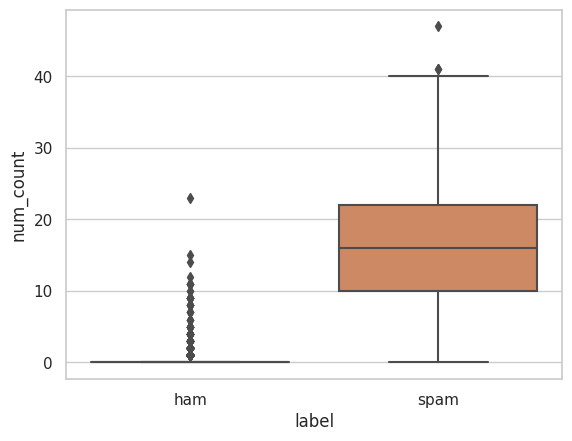

In [40]:
# 8.4 Boxplot for numeric counts by label
sns.boxplot(data=df, x="label", y="num_count")
plt.show()

## 9. Detect Phone Numbers, URLs, Emails, Numeric Counts, and Other Patterns

In this section, we identify **special patterns** in the messages:  
- Presence of **phone numbers**  
- Presence of **URLs**  
- Presence of **email addresses**  
- Count of **numeric digits**  
- Presence of **HTML tags**  
- **Duplicate messages**  
- **Unique spam words**  
- Aggregated numeric/boolean **feature summaries**  
- Visual comparison of digit counts  

These features often indicate spam content.

---

### 9.1 Detect Phone Numbers

Use a regex pattern to identify phone numbers and create a boolean column `has_phone`.

In [41]:
# 9.1 Detect phone numbers in messages
phone_pattern = r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'

df['has_phone'] = df['text'].str.contains(phone_pattern, regex=True)
print(df['has_phone'].value_counts(), '\n')
print(df.groupby('label')['has_phone'].sum())

has_phone
False    5567
True        5
Name: count, dtype: int64 

label
ham     1
spam    4
Name: has_phone, dtype: int64


### 9.2 Detect URLs

Use a regex pattern to identify URLs and create a boolean column `has_url`.

In [42]:
# 9.2 Detect URLs in messages
url_pattern = r'https?://\S+|www\.\S+'

df['has_url'] = df['text'].str.contains(url_pattern, regex=True)
print(df['has_url'].value_counts(), '\n')
print(df.groupby('label')['has_url'].sum())

has_url
False    5466
True      106
Name: count, dtype: int64 

label
ham       2
spam    104
Name: has_url, dtype: int64


### 9.3 Detect Email Addresses

Use a regex pattern to identify emails and create a boolean column `has_email`.

In [43]:
# 9.3 Detect emails in messages
email_pattern = r'\S+@\S+'

df['has_email'] = df['text'].str.contains(email_pattern, regex=True)
print(df['has_email'].value_counts(), '\n')
print(df.groupby('label')['has_email'].sum())

has_email
False    5552
True       20
Name: count, dtype: int64 

label
ham      2
spam    18
Name: has_email, dtype: int64


### 9.4 Count Numeric Digits

Count the total number of digits in each message and compute the average per label.

In [44]:
# 9.4 Count numbers in each message
df['num_numbers'] = df['text'].str.count(r'\d')
df[['label','num_numbers']].groupby('label').mean()

,num_numbers
label,
ham,0.299275
spam,15.759036


### 9.5 Detect HTML Tags

Check for the presence of HTML tags in the messages (e.g., `<tag>`) which can indicate spam or forwarded messages.

In [47]:
# 9.5 Detect HTML tags in messages
html_tag_msgs = df[df['text'].str.contains(r'<[^>]+>')]
html_tag_msgs.head()

,label,text,char_count,word_count,text_length,punct_count,num_count,upper_count,url_count,emoji_count,has_phone,has_url,has_email,num_numbers
689,spam,<Forwarded from 448712404000>Please CALL 08712...,111,15,111,3,23,1,0,0,False,False,False,23
2266,spam,<Forwarded from 88877>FREE entry into our å£25...,122,20,122,7,15,4,1,0,False,True,False,15
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...,183,30,183,6,22,1,0,0,False,False,False,22
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...,173,27,173,6,24,1,0,0,False,False,False,24
4110,spam,URGENT! Your Mobile number has been awarded a ...,141,21,141,6,24,3,0,0,False,False,False,24


### 9.6 Detect Duplicate Messages

Identify messages that are exact duplicates, which can indicate repeated spam or forwards.

In [48]:
# 9.6 Identify duplicate messages
duplicate_texts = df[df.duplicated('text', keep=False)]
print(f"We have {len(duplicate_texts)} duplocated texts\n\n\n")
duplicate_texts.head(30)

We have 684 duplocated texts





,label,text,char_count,word_count,text_length,punct_count,num_count,upper_count,url_count,emoji_count,has_phone,has_url,has_email,num_numbers
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,155,6,25,2,0,0,False,False,False,25
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,26,160,6,1,0,0,0,False,False,False,1
8,spam,WINNER!! As a valued network customer you have...,158,26,158,7,19,2,0,0,False,False,False,19
9,spam,Had your mobile 11 months or more? U R entitle...,154,29,154,2,13,1,0,0,False,False,False,13
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,26,136,8,22,4,0,0,False,False,False,22
12,spam,URGENT! You have won a 1 week FREE membership ...,156,26,156,9,20,7,1,0,False,True,False,20
45,ham,No calls..messages..missed calls,32,3,32,4,0,0,0,0,False,False,False,0
62,ham,Its a part of checking IQ,25,6,25,0,0,1,0,0,False,False,False,0
65,spam,"As a valued customer, I am pleased to advise y...",153,28,153,4,15,0,0,0,False,False,False,15
66,ham,"Today is \song dedicated day..\"" Which song wi...",124,23,124,10,0,0,0,0,False,False,False,0


### 9.7 Unique Spam Words

Find words that appear in spam messages but not in ham messages to detect spam-specific vocabulary.

In [49]:
# 9.7 Unique words in spam messages
spam_words = Counter(" ".join(df[df['label']=='spam']['text']).split())
ham_words  = Counter(" ".join(df[df['label']=='ham']['text']).split())

unique_spam_words = set(spam_words) - set(ham_words)
print(len(unique_spam_words))
print(list(unique_spam_words)[:30])

3106
['08719181513.', 'Eve?', 'mates.', '09058091854', 'Virgin', '09061744553', 'Date', 'NY-USA', 'camera/video', 'bloomberg.com', 'latests', 'Box434SK38WP150PPM18+', 'Sale!', 'MOB', 'Click', 'Remove', '8077', '08714714011', 'artists.', '09066649731from', '08706091795', 'Sender:', 'SMS,', 'Winner', 'AOM,', 'UnSub', 'FREE>Ringtone!Reply', '08718726270', 'SPECIALE', 'www.t-c.biz']


### 9.8 Feature Aggregation by Label

Summarize selected numeric and boolean features by label to compare spam and ham.

In [50]:
# 9.8 Aggregate selected features by label
features = ['has_url', 'has_phone', 'has_email', 
            'punct_count', 'num_count', 'upper_count', 
            'emoji_count', 'num_numbers']

df.groupby('label')[features].agg(['sum', 'mean'])

has_url           has_phone           has_email           punct_count  \
          sum      mean       sum      mean       sum      mean         sum   
label                                                                         
ham         2  0.000415         1  0.000207         2  0.000415       19143   
spam      104  0.139224         4  0.005355        18  0.024096        4593   

                num_count            upper_count           emoji_count  \
           mean       sum       mean         sum      mean         sum   
label                                                                    
ham    3.967461      1444   0.299275        2094  0.433990           3   
spam   6.148594     11772  15.759036        1773  2.373494           0   

                num_numbers             
           mean         sum       mean  
label                                   
ham    0.000622        1444   0.299275  
spam   0.000000       11772  15.759036

### 9.9 Visualize

Boxplot to compare the distribution (for example digit counts) in ham vs spam messages.  
Feel free to check the others.

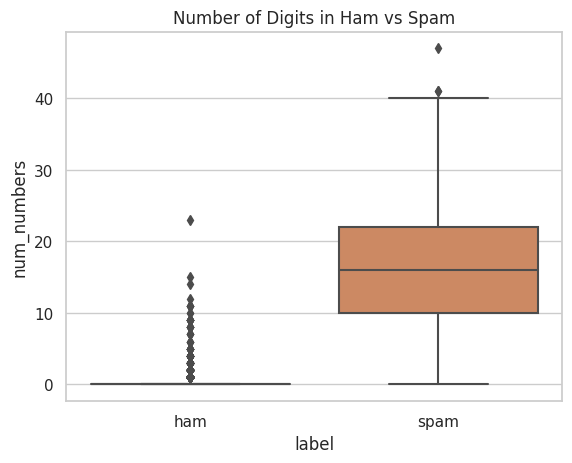

In [52]:
# 9.9 Boxplot for numeric counts
sns.boxplot(data=df, x='label', y='num_numbers')
plt.title("Number of Digits in Ham vs Spam")
plt.show()

## 10. TF-IDF Feature Analysis

In this section, we analyze the text messages using **TF-IDF (Term Frequency–Inverse Document Frequency)** to identify the most important words in **spam** and **ham** messages.  

This helps to highlight words that are distinctive for each class.

---

### 10.1 Compute TF-IDF Matrix

Transform the text data into a TF-IDF matrix and get feature names.

In [56]:
# 10.1 TF-IDF transformation
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text'])
features = tfidf.get_feature_names_out()

### 10.2 Compute Average TF-IDF Scores per Class

Calculate the mean TF-IDF score of each word for spam and ham messages.

In [58]:
# 10.2 Compute mean TF-IDF per label
spam_tfidf_mean = tfidf_matrix[(df['label']=='spam').values].mean(axis=0).A1
ham_tfidf_mean  = tfidf_matrix[(df['label']=='ham').values].mean(axis=0).A1

### 10.3 Top TF-IDF Words

Identify the top 20 words for spam and ham messages based on their TF-IDF scores.

In [59]:
# 10.3 Top TF-IDF words in spam
top_spam_idx = np.argsort(spam_tfidf_mean)[-20:]
top_spam_words = [(features[i], spam_tfidf_mean[i]) for i in top_spam_idx[::-1]]
top_spam_words

[('free', 0.04735811408058551),
 ('txt', 0.03370075812891171),
 ('mobile', 0.031266028645998055),
 ('claim', 0.029743151292549546),
 ('text', 0.02788020099730896),
 ('stop', 0.02765105880133353),
 ('prize', 0.026602399483613162),
 ('ur', 0.025754214162548753),
 ('reply', 0.025634201017960545),
 ('www', 0.023534666026771404),
 ('won', 0.021369571233728287),
 ('new', 0.020091402973627784),
 ('cash', 0.019776433384523277),
 ('urgent', 0.01955633231684913),
 ('uk', 0.019196398910007285),
 ('150p', 0.01882473155647892),
 ('service', 0.01833362203777755),
 ('nokia', 0.017488333086446647),
 ('contact', 0.017437317447670263),
 ('win', 0.01671214778982817)]

In [60]:
# 10.3 Top TF-IDF words in ham
top_ham_idx  = np.argsort(ham_tfidf_mean)[-20:]
top_ham_words  = [(features[i], ham_tfidf_mean[i]) for i in top_ham_idx[::-1]]
top_ham_words

[('ok', 0.021737494667034438),
 ('ll', 0.016766100907572253),
 ('come', 0.014391000236487459),
 ('gt', 0.014162677519294769),
 ('lt', 0.014102287024380412),
 ('just', 0.013629820153226353),
 ('good', 0.012835360401519958),
 ('know', 0.012296355700656356),
 ('got', 0.012179770439120496),
 ('sorry', 0.011988163967006004),
 ('like', 0.011789905500753687),
 ('home', 0.01168469350670934),
 ('time', 0.011623433381345827),
 ('later', 0.01140516123845982),
 ('lor', 0.010692582807104181),
 ('going', 0.010690689633821807),
 ('ur', 0.01003817070554207),
 ('da', 0.009880126470926877),
 ('day', 0.009820786560923988),
 ('want', 0.009695865140666416)]

### 10.4 Visualize Top TF-IDF Words

Plot horizontal bar charts to show the top TF-IDF words for spam and ham messages.

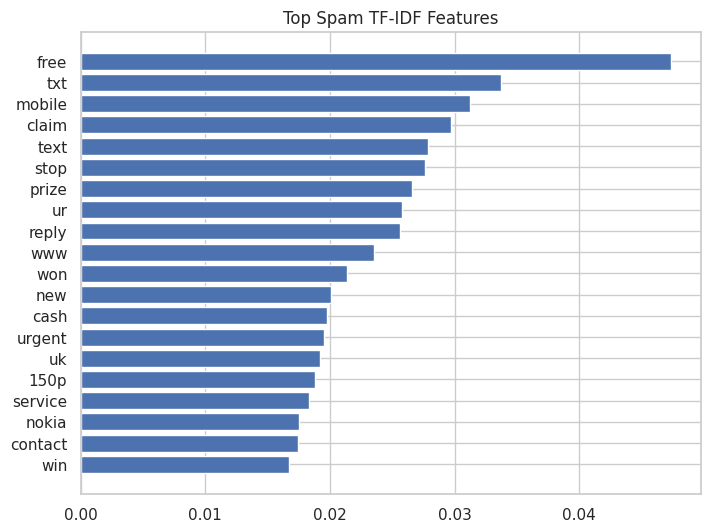

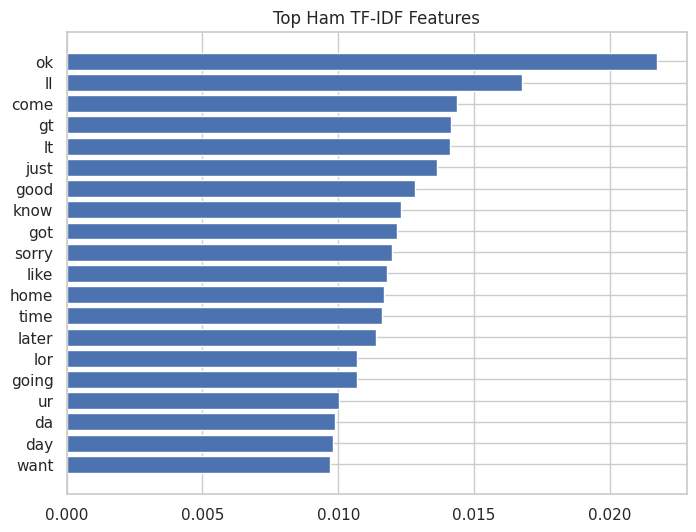

In [61]:
# 10.4 Function to plot top words
def plot_top_words(words, title):
    labels, scores = zip(*words)
    plt.figure(figsize=(8,6))
    plt.barh(labels, scores)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot for spam
plot_top_words(top_spam_words, "Top Spam TF-IDF Features")
# plot for ham
plot_top_words(top_ham_words, "Top Ham TF-IDF Features")

## 11. Conclusion

In this notebook, we performed a **comprehensive Exploratory Data Analysis (EDA)** on the SMS Spam Collection dataset.  

Key observations and insights:

- **Label distribution**: The dataset contains both ham and spam messages, with ham being the majority class.
- **Message length**: Spam messages tend to be slightly longer on average, with more variability in character and word counts.
- **Common words**: Specific words and n-grams appear more frequently in spam messages (e.g., "call now", "free", "win"), while ham messages contain everyday conversation terms.
- **Text features**: Features such as punctuation counts, uppercase words, numbers, URLs, email addresses, HTML tags, and emojis differ between ham and spam messages, providing useful signals for classification.
- **Duplicates & unique words**: There are some duplicate messages, and unique spam-specific words were identified, which can be valuable for feature engineering.
- **TF-IDF analysis**: TF-IDF highlights the most important words in spam vs ham messages, which can guide feature selection in modeling.

This EDA has provided a solid understanding of the dataset's structure, patterns, and potential predictive features.  

**Next Steps:**  
In the **next notebook**, we will continue with **preprocessing and modeling**, building machine learning and deep learning models to classify messages as ham or spam.
